In [1]:
import tensorflow as tf
import numpy as np

In [9]:
print("tensorflow: ",tf.__version__)
print("numpy: ", np.__version__)

tensorflow:  2.3.0
numpy:  1.18.5


In [10]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
input_shape = [28, 28, 1]

X_train = tf.reshape(X_train, [X_train.shape[0]] + input_shape)
X_test = tf.reshape(X_test, [X_test.shape[0]] + input_shape)

X_train = tf.cast(X_train, dtype=tf.float32)
X_test = tf.cast(X_test, dtype=tf.float32)

X_train /= 255
X_test /= 255

In [13]:
X_train.shape

TensorShape([60000, 28, 28, 1])

In [14]:
import matplotlib.pyplot as plt
from collections import Counter 

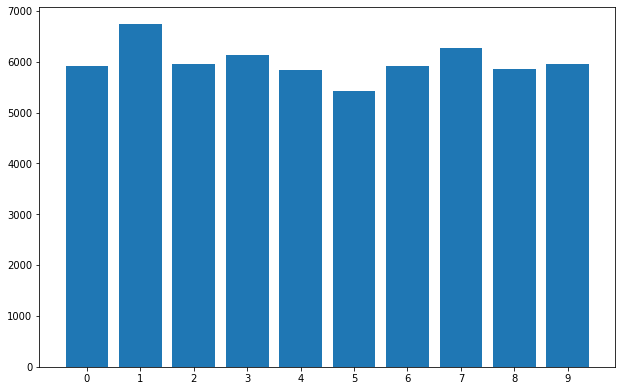

In [16]:
label_counts = dict(Counter(y_train))

f = plt.figure(figsize=(8,5))
ax = f.add_axes([0,0,1,1])
ax.bar(label_counts.keys(), label_counts.values())
ax.set_xticks(np.arange(len(label_counts)))
plt.show()

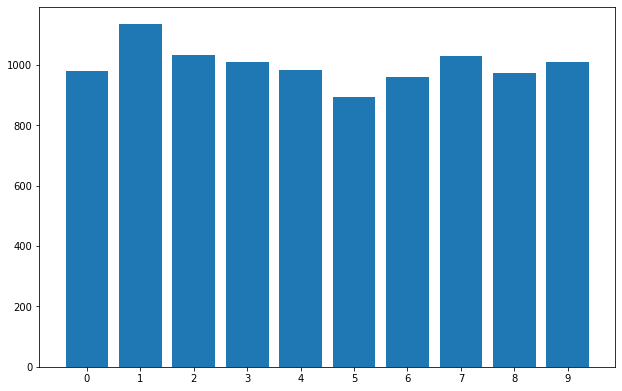

In [17]:
label_counts = dict(Counter(y_test))

f = plt.figure(figsize=(8,5))
ax = f.add_axes([0,0,1,1])
ax.bar(label_counts.keys(), label_counts.values())
ax.set_xticks(np.arange(len(label_counts)))
plt.show()

In [18]:
from sklearn.preprocessing import OneHotEncoder

# Reshape so labels can be onehot encoded
y_train = tf.reshape(y_train, [-1, 1])
y_test = tf.reshape(y_test, [-1, 1])

# Set sparse to False in order to return an array
encoder = OneHotEncoder(sparse=False)

y_train = tf.convert_to_tensor(encoder.fit_transform(y_train))
y_test = tf.convert_to_tensor(encoder.fit_transform(y_test))

In [20]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(28, (3, 3), input_shape=input_shape),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax),
])

loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

# Train the model
h = model.fit(x=X_train, y=y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 33s 17ms/step - loss: 1.5424 - accuracy: 0.9243 - val_loss: 1.5006 - val_accuracy: 0.9629
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 1.4955 - accuracy: 0.9673 - val_loss: 1.4906 - val_accuracy: 0.9728
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 1.4850 - accuracy: 0.9773 - val_loss: 1.4850 - val_accuracy: 0.9764
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 1.4800 - accuracy: 0.9818 - val_loss: 1.4837 - val_accuracy: 0.9780
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 1.4768 - accuracy: 0.9851 - val_loss: 1.4819 - val_accuracy: 0.9802
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 1.4744 - accuracy: 0.9873 - val_loss: 1.4822 - val_accuracy: 0.9796
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 1.4732 - accuracy: 0.9884 - val_loss: 1.4781 -

In [21]:
model.save('model.h5')

In [22]:
import os
os.getcwd()

'/content'

In [31]:
!pip install tensorflowjs

     |████████████████████████████████| 61kB 1.8MB/s 
     |████████████████████████████████| 137.3MB 79kB/s 
     |████████████████████████████████| 92kB 10.3MB/s 
     |████████████████████████████████| 256kB 41.2MB/s 
     |████████████████████████████████| 921kB 44.1MB/s 
  Created wheel for PyInquirer: filename=PyInquirer-1.0.3-cp36-none-any.whl size=32851 sha256=eabf73e99c91c48d8c30ef2aa95455b180b2e009ed6e9a9f17e8999cb88991cb
  Stored in directory: /root/.cache/pip/wheels/52/6c/b1/3e4b0e8daf42a92883c7641c0ea8ffb62e0490ebed2faa55ad
Successfully built PyInquirer
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: tensorflow-hub 0.8.0
    Uninstalling tensorflow-hub-0.8.0:
      Successfully uninstalled tensorflow-hub-0.8.0
  Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Found existing installation

In [35]:
!tensorflowjs_converter --input_format=keras model.h5 model